# Part 2 - Working with Geometries

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-geometries" data-toc-modified-id="Creating-geometries-1">Creating geometries</a></span><ul class="toc-item"><li><span><a href="#Object-Model-Diagram-(OMD)-of-the-geometry-module" data-toc-modified-id="Object-Model-Diagram-(OMD)-of-the-geometry-module-1.1">Object Model Diagram (OMD) of the geometry module</a></span></li><li><span><a href="#Creating-Point-objects" data-toc-modified-id="Creating-Point-objects-1.2">Creating <code>Point</code> objects</a></span></li><li><span><a href="#Creating-Polyline-objects" data-toc-modified-id="Creating-Polyline-objects-1.3">Creating <code>Polyline</code> objects</a></span></li><li><span><a href="#Creating-Polygon-objects" data-toc-modified-id="Creating-Polygon-objects-1.4">Creating <code>Polygon</code> objects</a></span></li><li><span><a href="#Creating-geometries-with-a-different-spatial-reference" data-toc-modified-id="Creating-geometries-with-a-different-spatial-reference-1.5">Creating geometries with a different spatial reference</a></span></li><li><span><a href="#Text-representations-of-geometries" data-toc-modified-id="Text-representations-of-geometries-1.6">Text representations of geometries</a></span></li></ul></li><li><span><a href="#Working-with-geometry-object" data-toc-modified-id="Working-with-geometry-object-2">Working with geometry object</a></span><ul class="toc-item"><li><span><a href="#Geometry-Engines" data-toc-modified-id="Geometry-Engines-2.1">Geometry Engines</a></span></li></ul></li><li><span><a href="#Creating-geometries-interactively-using-the-map-widget" data-toc-modified-id="Creating-geometries-interactively-using-the-map-widget-3">Creating geometries interactively using the map widget</a></span><ul class="toc-item"><li><span><a href="#Computing-area-of-a-polygon-drawn-on-the-map" data-toc-modified-id="Computing-area-of-a-polygon-drawn-on-the-map-3.1">Computing area of a polygon drawn on the map</a></span></li></ul></li><li><span><a href="#Extracting-geometries-from-existing-feature-layers" data-toc-modified-id="Extracting-geometries-from-existing-feature-layers-4">Extracting geometries from existing feature layers</a></span><ul class="toc-item"><li><span><a href="#Get-geometries-from--a-spatially-enabled-DataFrame-object" data-toc-modified-id="Get-geometries-from--a-spatially-enabled-DataFrame-object-4.1">Get geometries from  a <code>spatially enabled DataFrame</code> object</a></span></li><li><span><a href="#Get-geometries-from-Feature-objects" data-toc-modified-id="Get-geometries-from-Feature-objects-4.2">Get geometries from <code>Feature</code> objects</a></span></li><li><span><a href="#Get-geometries-from-a-local-layer" data-toc-modified-id="Get-geometries-from-a-local-layer-4.3">Get geometries from a local layer</a></span></li></ul></li><li><span><a href="#Construct-higher-level-objects-from-geometry-objects" data-toc-modified-id="Construct-higher-level-objects-from-geometry-objects-5">Construct higher level objects from geometry objects</a></span><ul class="toc-item"><li><span><a href="#Create-Feature,-FeatureSet-and-FeatureCollection-objects-from-Geometry-objects" data-toc-modified-id="Create-Feature,-FeatureSet-and-FeatureCollection-objects-from-Geometry-objects-5.1">Create <code>Feature</code>, <code>FeatureSet</code> and <code>FeatureCollection</code> objects from <code>Geometry</code> objects</a></span></li><li><span><a href="#Create-an-SeDF-object-with-geometries" data-toc-modified-id="Create-an-SeDF-object-with-geometries-5.2">Create an <code>SeDF</code> object with geometries</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

## Creating geometries

The [`arcgis.geometry`](/python/api-reference/arcgis.geometry.html#) module defines geometry types for working with geographic features in a GIS. It provides functions which use geometric types as input and output as well as functions for easily converting geometries between different representations.

Several functions in this module accept geometries represented as Python dictionary objects. To get started, we import the following classes and functions from the `geometry` module.

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
import pandas as pd

In [2]:
gis = GIS('home')

### Object Model Diagram (OMD) of the geometry module

The picture below illustrates how the geometry module is organized (which showcase only the important objects, sub-modules, and properties via the OMD):

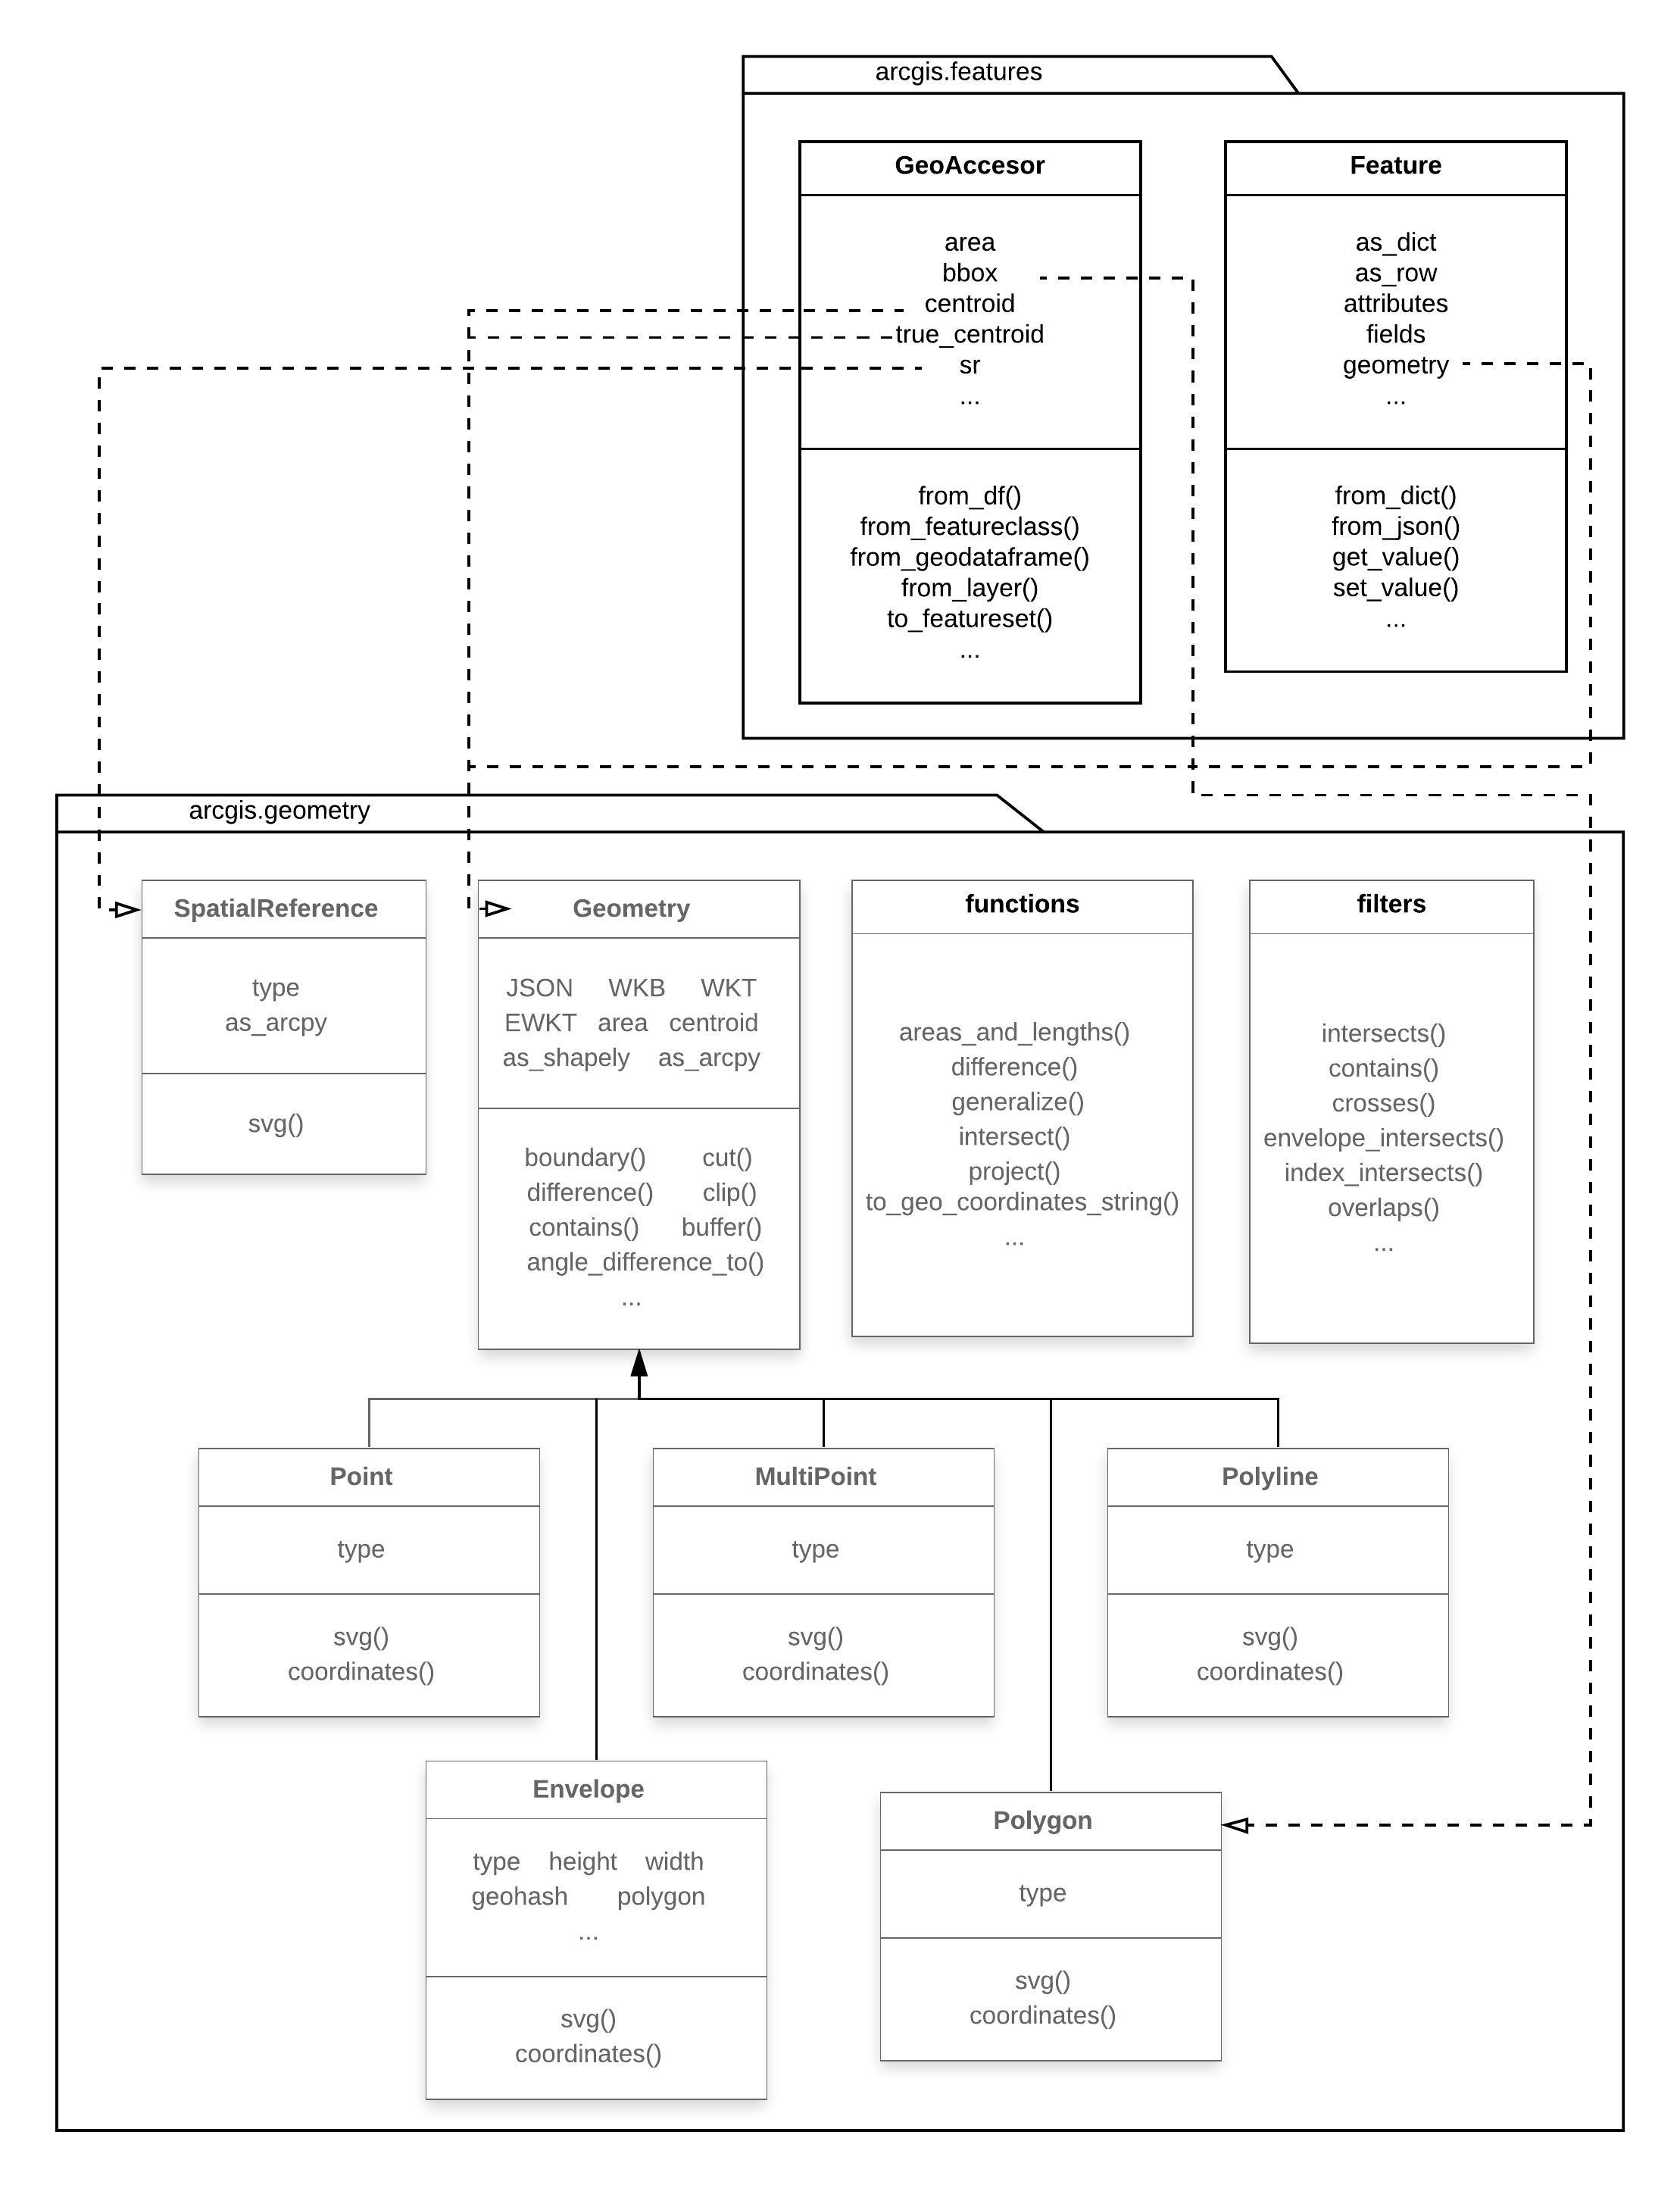

The `arcgis.geometry` module contains classes and utility functions to construct geometry objects such as `Point`s, `Polyline`s, `Polygon`s and perform spatial operations on them. The `arcgis.geometry.Geometry` class is a base class from which specific geometry classes inherit. Users generally do not instantiate the base class, but work directly with one or more child classes such as `Point`, `Polyline`, `Polygon` etc. The base class provides geometry operations such as `clip()`, `difference()`, `buffer()`... which the child classes inherit. The `arcgis.geometry.functions` sub-module contains an alternate set of spatial operations. The difference between these two sets of operations is explained in the [Spatial operations on geometries](../part3-spatial-operations-on-geometries#two-patterns-of-applying-spatial-operations) guide in the _Two patterns of applying spatial operations_ section.

The `SpatialReference` class is used to represent `spatial reference` and `coordinate system information`. The `arcgis.geometry.filters` module provides functions that can be used to define spatial relationships to be used in queries against feature layers and imagery layers.

The layout diagram further shows how `Feature` and `spatially enabled DataFrame` objects from `arcgis.features` module return components of the geometry module.

### Creating `Point` objects

A [point](/python/api-reference/arcgis.geometry.html#arcgis.geometry.Point) contains x and y fields along with a `spatialReference` field. A point can also contain m and z fields as well, representing the vertical and linear referencing system coordinates. A point is empty when its x field is present and has the value null or the string `NaN`. An empty point has no location in space.

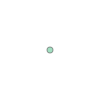

In [3]:
pt = Point({"x" : -118.15, "y" : 33.80, 
            "spatialReference" : {"wkid" : 4326}})
pt

As shown above, you can create a `Point` geometry using a dictionary. The `x` and `y` key value pairs in this example contain longitude and latitude respectively. The `spatialReference` dictionary with the `wkid` kvp specifies the coordinate system in which `x` and `y` are in. Thus, you could have passed it X and Y values from a projected coordinate system and constructed the same point by specifying the appropriate `wkid`.

When using the Jupyter Notebook (or ArcGIS Notebook) interface, you can query a geometry and get a visual representation as shown in the cell earlier. Alternately you can check the validity of a geometry by querying the `is_valid()` method.

In [4]:
pt.is_valid()

True

In [5]:
print(pt.is_empty)

False


To get the geometry type, use the `type` property:

In [6]:
print(pt.type)

Point


To get the object type in Python, use the built-in `type` function:

In [7]:
type(pt)

arcgis.geometry._types.Point


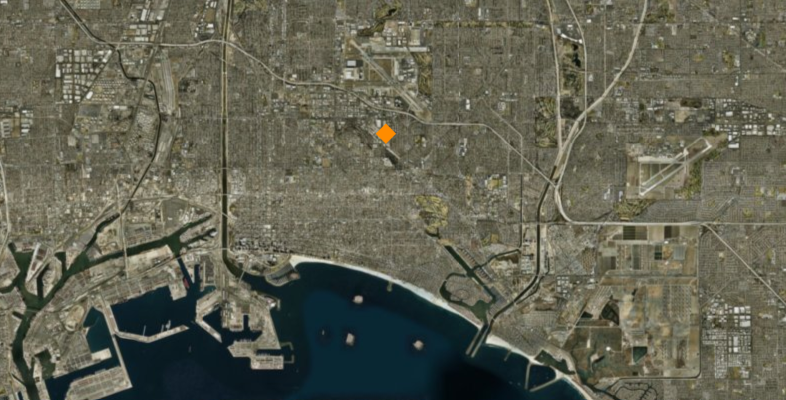

In [16]:
map0 = gis.map("Port of Long Beach")
map0.basemap = "satellite"
map0.zoom = 6
map0

In [12]:
pt_sym = {
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255,140,0,255],        
    "size": 14,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255,140,0,255],
        "width": 1}
}
map0.draw(pt, symbol=pt_sym)

### Creating `Polyline` objects

A [polyline](/python/api-reference/arcgis.geometry.html#arcgis.geometry.Polyline) contains an array of `paths` or `curvePaths` and a `spatialReference`. For polylines with curvePaths, see the sections on JSON curve object and Polyline with curve. Each path is represented as an array of points, and each point in the path is represented as an array of numbers. A polyline can also have boolean-valued `hasM` and `hasZ` fields. An empty polyline is represented with an empty array for the paths field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error.

First, let us try initializing an **invalid** polyline object, and see how it is handled.

In [8]:
line = {
  "paths" : [[[-97.06138],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline = Polyline(line)

In [9]:
print(polyline.spatialReference)

{'wkid': 4326}


In [10]:
print(polyline.is_valid())

False


The geometry we just created is invalid, yet the API allowed you to still create it. This because, the API does not check for validity in an eager fashion. Rather it checks when `is_valid()` is called, in an on-demand fashion. This is for performance reasons.


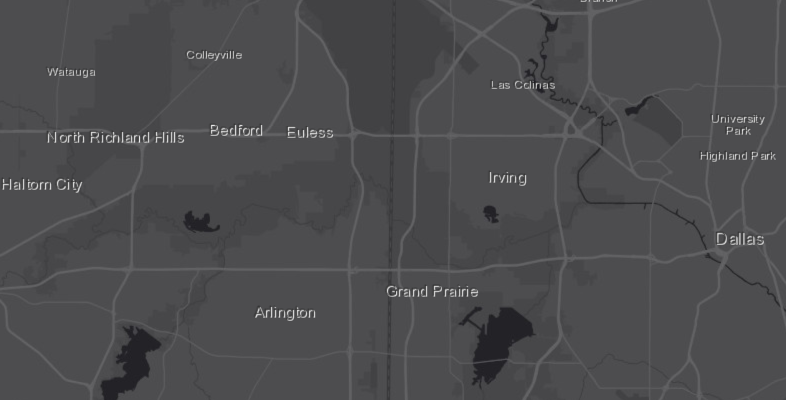

In [49]:
map1 = gis.map()
map1.basemap = "dark-gray"
map1.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map1.zoom = 11.0
map1

In [25]:
map1.draw(polyline) # would not draw anything

That did not draw anything. Now, try a valid polyline geometry. In the example below, we specify coordinates in latitude and longitude and specify the coordinate system appropriately as GCS WGS 84 using the `wkid` `4326`.

In [11]:
line1 = {
  "paths" : [[[-97.06138,32.837],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline1 = Polyline(line1)
print(polyline1.is_valid())

True


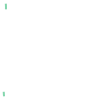

In [12]:
polyline1


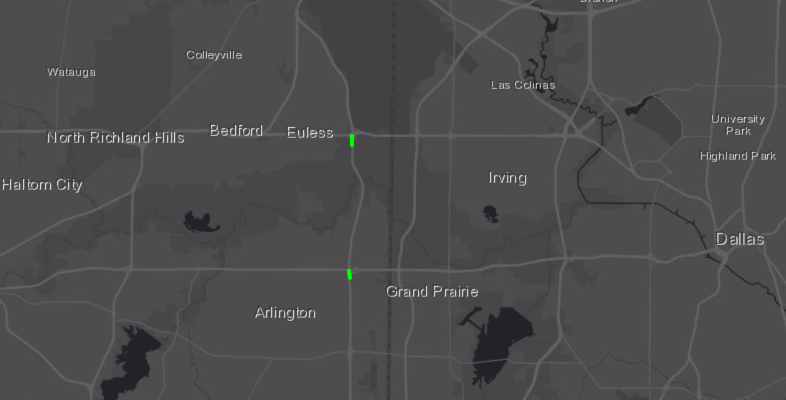

In [52]:
map2 = gis.map()
map2.basemap = "dark-gray"
map2.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map2.zoom = 11.0
map2

In [51]:
sym_poly_aoi = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [0,255,0,255],
     "width": 3}
}
map2.draw(polyline1, symbol = sym_poly_aoi)

### Creating `Polygon` objects

A [polygon](/python/api-reference/arcgis.geometry.html#arcgis.geometry.Polygon) contains an array of `rings` or `curveRings` and a `spatialReference`. Each ring is represented as an array of points. The **first point of each ring is always the same as the last point**. Each point in the ring is represented as an array of numbers. A polygon can also have boolean-valued `hasM` and `hasZ` fields. An empty polygon is represented with an empty array for the rings field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error. 

Exterior rings are **oriented clockwise**, while **holes** are oriented **counter-clockwise**. Rings can touch at a vertex or self-touch at a vertex, but there should be no other intersections.

In [13]:
polygon1 = Polygon({'spatialReference': {'latestWkid': 4326}, 
                'rings': [[[-97.06587202923951, 32.75656343500563], [-97.07033522518535, 32.75454232619796],
                           [-97.07179434702324, 32.75443405154119], [-97.073596791488, 32.75475887587208],
                           [-97.07501299810983, 32.75475887587208], [-97.07492716677937, 32.75616643554153],
                           [-97.07595713555828, 32.75602207118053], [-97.07115061698558, 32.75887321736912],
                           [-97.06930525730476, 32.75890930713694], [-97.06479914614289, 32.75739351976198],
                           [-97.06587202923951, 32.75656343500563]]]
                })

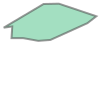

In [14]:
polygon1

In [15]:
print(polygon1.type)

Polygon


In [16]:
type(polygon1)

arcgis.geometry._types.Polygon


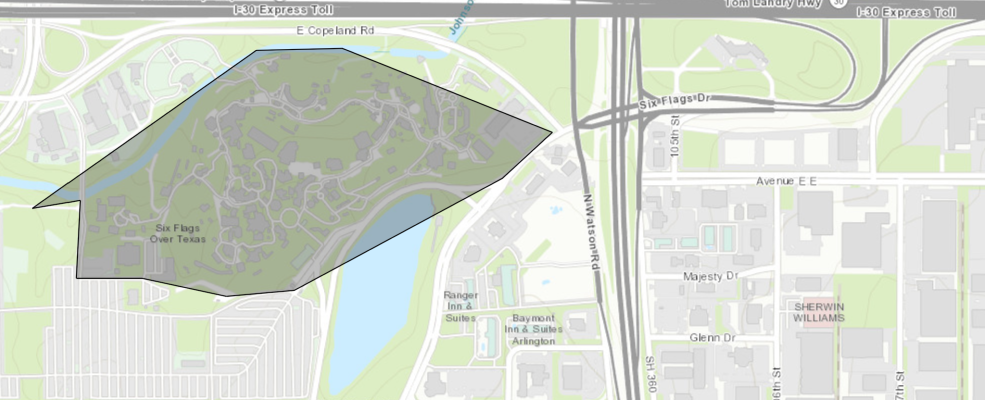

In [143]:
map3 = gis.map()
map3.basemap = "topo"
map3.zoom = 16
map3.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3

In [120]:
map3.draw(polygon1)

### Creating geometries with a different spatial reference
In the examples above, all geometries were created using latitude and longitude. Hence we used a spatial reference of `4326` which corresponds to the WGS84 GCS. In the cell below, we will create the same polygon object, but with a PCS.

In [19]:
polygon1_proj = Polygon({'spatialReference': {'wkid': 3857}, 
                  'rings': [[[-10806331.461044524, 3862983.679353406], [-10806446.116586955, 3862964.5700963344], 
                             [-10805911.057388945, 3863341.9779235027], [-10805705.632875424, 3863346.7552377703], 
                             [-10805204.01487729, 3863146.1080385167], [-10805323.447733987, 3863036.229810354],  
                             [-10805820.288417853, 3862768.7002113485], [-10805982.717102963, 3862754.368268545], 
                             [-10806183.364302218, 3862797.3640969563], [-10806341.01567306, 3862797.3640969563], 
                             [-10806331.461044524, 3862983.679353406]]]
                })

The PCS used here is Web Mercator Auxiliary Sphere with a wkid of `3857`. The coordinates is in meters.


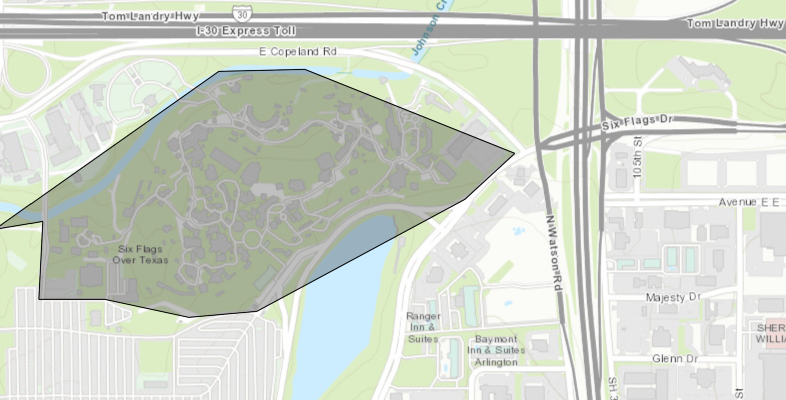

In [70]:
map3_proj = gis.map()
map3_proj.basemap = "topo"
map3_proj.zoom = 16
map3_proj.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3_proj

In [69]:
map3_proj.draw(polygon1_proj)

As you can see from both the maps, we were able to create the same geometries using different coordinate systems and they would line up when plotted one over the other.

### Text representations of geometries

At any point in time, you can view the text representations of your geometry objects in three forms as shown below:

In [18]:
print("Geometry represented in JSON:\n", polygon1.JSON, 
      "\n\nGeometry represented in WKB:\n", polygon1.WKB, 
      "\n\nGeometry represented in WKT:\n", polygon1.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

You can convert from one spatial reference to another through a process called 'projection'. The `arcgis.geometry.project()` function can be used for this. This function sends to geometries (in JSON format seen above) to the [Geometry Service](https://developers.arcgis.com/rest/services-reference/geometry-service.htm) configured with your GIS. The service performs the projection and sends it back to your Python client. 

If you have large geometries, projecting them locally (either using ArcPy or Shapely backend) is recommended over sending them over to the geometry service. For more details on this, check out the [spatial operations](../part3-spatial-operations-on-geometries) guide.

In [20]:
geom1_reprojected = project(geometries = [polygon1_proj], in_sr = 3857, out_sr = 4326)[0]
geom1_reprojected.type

'Polygon'

You can inspect the coordinates by printing them as shown below. Compare those with the geometries printed earlier.

In [21]:
print("Geometry represented in JSON:\n", geom1_reprojected.JSON, 
      "\n\nGeometry represented in WKB:\n", geom1_reprojected.WKB, 
      "\n\nGeometry represented in WKT:\n", geom1_reprojected.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

## Working with geometry object

Properties of geometry objects include,
  - `centroid`: returns the center of the geometry
  - `area`: returns the area of a polygon feature, or `None` for all other feature types. The area is in the units of the spatial reference.
  - `length`: returns the length of the linear feature, or zero for point and multipoint feature types. The length units is the same as the spatial reference.
  - `extent`: returns the extent of the geometry as a tuple containing (xmin, ymin, xmax, ymax).
  - `as_arcpy`: returns the class as an `arcpy` `SpatialReference` object
  - `as_shapely`: returns a `shapely` geometry object

You will see that for geometry objects in different spatial references, the properties return varied results (transformed through the spatial reference).

In [23]:
polygon1_proj.centroid, geom1_reprojected.centroid

((-10805839.610595193, 3863047.3497144855),
 (-97.0705088053709, 32.756647420138925))

In [24]:
polygon1_proj.area, geom1_reprojected.area

(431509.386639783, 2.92840477522626e-05)

The variable `geom1_reprojected` has the same polygon in GCS spatial reference. Accessing area or length while in GCS may not yield meaningful results as the units are decimal degrees. Hence, the recommendation is to project the geometry to a PCS (such as `polygon1_proj` in this example which uses Web Mercator Aux Sphere projection with units in meters) and access those properties in projected units.

In [25]:
polygon1_proj.length, geom1_reprojected.length

(2955.798323907705, 0.025605496007056323)

In [26]:
print(polygon1_proj.extent)
print(geom1_reprojected.extent)

(-10806446.116586955, 3862754.368268545, -10805204.01487729, 3863346.7552377703)
(-97.07595713555828, 32.75443405154119, -97.06479914614289, 32.75890930713694)


### Geometry Engines

The Python API uses either [`shapely`](https://pypi.org/project/Shapely/) or [`arcpy`](https://www.esri.com/en-us/arcgis/products/arcgis-python-libraries/libraries/arcpy) as back-ends (engines) for processing geometries. The API is identical no matter which you use. However, at any point in time, only one engine will be used. The section below shows you how to access your geometries as their corresponding back-end objects.

By default, the geometry module looks for `arcpy`. If not present in your current `conda` environment, it looks for `shapely`. The cell below shows how to access the current object as a native `shapely` geometry object.

In [30]:
try:
    polygon1_proj_shapely_obj = polygon1_proj.as_shapely
    print(type(polygon1_proj_shapely_obj))
except OSError as e:
    print(e)

<class 'shapely.geometry.multipolygon.MultiPolygon'>


If your environment did not have `shapely`, you would be presented with an error similar to shown below:

In [178]:
try:
    polygon1_proj.as_shapely
except OSError as e:
    print(e)

[WinError 126] The specified module could not be found


If your `conda`environment has `arcpy`, you can access the geometry as an `arcpy` geometry as shown below:

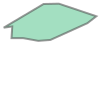

In [175]:
geom1_reprojected.as_arcpy

Besides using properties `as_shapely` and `as_arcpy` to detect the geometry engine installed, the built-in function `_check_geometry_engine` returns a tuple of boolean values representing if `arcpy` and/or `shapely` geometry engine is installed.

In [1]:
pt._check_geometry_engine()

(False, True)


In [2]:
pt._HASARCPY

False


In [3]:
pt._HASSHAPELY

True


## Extracting geometries from existing feature layers

Besides creating geometries from scratch, we can also access geometries from existing feature classes, and feature layers - either remotely on the web, or stored locally. Let's first explore how to get geometries from a web feature layer.

### Get geometries from  a `spatially enabled DataFrame` object

Next, we will be looking at a path where geometry objects are extracted from Spatially Enabled DataFrame (SeDF) which is obtained from `FeatureLayer` (in short, the path can be represented as `FeatureLayer` -> `SeDF` -> `geometry` objects).

In [4]:
dc_fl = FeatureLayer('https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/10')
dc_df = pd.DataFrame.spatial.from_layer(dc_fl)
display(dc_df.head())

,OBJECTID,CITY_NAME,STATE_CITY,CAPITAL,WEB_URL,AREAKM,AREAMILES,Shape_Length,Shape_Area,SHAPE
0,1,Washington,1150000,Y,http://www.dc.gov,177.47,68.52,67608.276922,1.774562e+08,"{""rings"": [[[-8584936.334474642, 4712272.26069..."


In [5]:
type(dc_df.spatial)

arcgis.features.geo._accessor.GeoAccessor


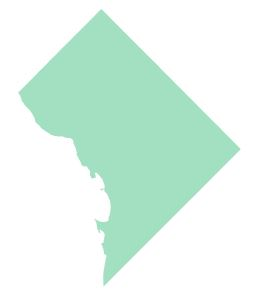

In [11]:
display(dc_df.spatial)

If you are currently on `arcpy` or `shapely` geometry engines, you should see a preview representing the shape of the geometry or the `SeDF` object above. If your machine is without geometry engines, then `display(dc_df.spatial)` would print the JSON representation of the geometry object, e.g. 

```
{'rings': [[[-8584936.334474642, 4712272.260693985],
[-8584936.299852336, 4712272.294257972],
[-8576161.160866661, 4721094.044860408],
[-8561487.41107954, 4706346.502976524],
[-8575944.799488472, 4691870.205657273],
[-8575944.771677606, 4691904.203184697],
[-8575947.014354223, 4692094.371141138],
[-8575956.007432679, 4692617.3203350045],
[-8575958.298881542, 4692731.805968994],
[-8575962.881262433, 4693148.057541993],
[-8575941.7592397, 4693295.905004359],
...]],
'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
```

Besides looking at the `SeDF` object, we can also explore each entry it contains, and its boundingbox property `bbox`.

In [7]:
poly1 = dc_df.iloc[0].SHAPE
type(poly1)

arcgis.geometry._types.Polygon


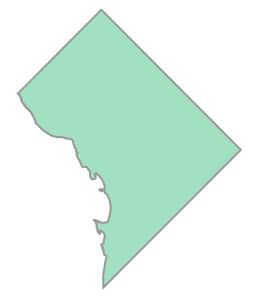

In [12]:
display(poly1)

<class 'arcgis.geometry._types.Polygon'>



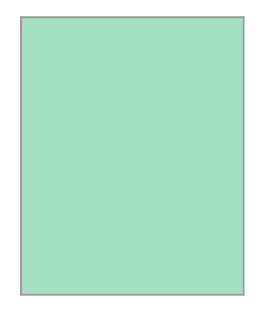

In [13]:
print(type(dc_df.spatial.bbox))
display(dc_df.spatial.bbox)

To show the geographic relationship between the geometric shapes of the `SeDF` object and its `bbox` property, we can draw both geometries on the map:


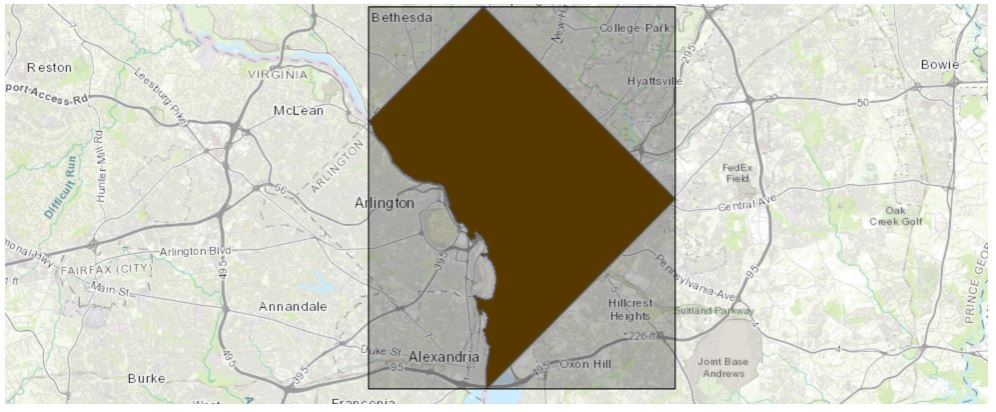

In [17]:
dc_map = gis.map('Washington DC')
dc_map

In [16]:
dc_map.draw(dc_df.iloc[0].SHAPE, 
            symbol={
                      "type": "esriSFS",
                      "style": "esriSFSSolid",
                      "color": [115,76,0,255],
                        "outline": {
                         "type": "esriSLS",
                         "style": "esriSLSSolid",
                         "color": [110,110,110,255],
                         "width": 1}
                    })
dc_map.draw(dc_df.spatial.bbox)

### Get geometries from `Feature` objects

Besides the first approach (`FeatureLayer` -> `SeDF` -> `geometry`), geometries can also be extracted from `FeatureSet` or `Feature` objects (in short, this path can be represented as `FeatureLayer` -> `FeatureSet` -> `Feature` -> `geometry` objects).

This approach is similar to what we have done in previous section, such as `pp_df = pd.DataFrame.spatial.from_layer(pp_fl)`
and `pp_df.head()`.

In [47]:
# tax incentives
pp_fl = FeatureLayer('https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/24')
pp_fset = pp_fl.query()
pp_fset

<FeatureSet> 98 features

In [62]:
pp_sdf = pp_fset.sdf
pp_sdf.head()

,OBJECTID,NAME,WEB_URL,Shape_Length,Shape_Area,FEDTRACTNO,TRACTNO,AREASQMI,POPDENSITY,TOTAL,TRACT_NAME,TRACT,GEOID,ACRES,ID,CITY,STATUS,SHAPE
0,1,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3629.654865,7.690694e+05,19.01,19.1,0.296939,13524.645551,4016,2010 Tract 19.01,001901,11001001901,190.041207,15,Brightwood,Qualified,"{""rings"": [[[-8574620.698597332, 4717365.76244..."
1,2,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3936.332156,7.871354e+05,88.04,88.4,0.303915,7936.437428,2412,2010 Tract 88.04,008804,11001008804,194.505405,80,Ivy City,Qualified,"{""rings"": [[[-8569465.936656462, 4707937.83407..."
2,3,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,2991.033699,2.994830e+05,89.03,89.3,0.115631,22770.708307,2633,2010 Tract 89.03,008903,11001008903,74.003848,87,Kingman Park,Qualified,"{""rings"": [[[-8569236.061578225, 4708392.59219..."
3,4,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3952.278822,8.896368e+05,10.02,10.2,0.343491,10020.649467,3442,2010 Tract 10.02,001002,11001001002,219.834053,107,Mclean Gardens,Qualified,"{""rings"": [[[-8579661.69146017, 4712166.487627..."
4,5,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,4800.866903,1.077533e+06,34,34,0.416038,10448.569315,4347,2010 Tract 34,003400,11001003400,266.264201,91,Ledroit Park,Qualified,"{""rings"": [[[-8573522.865645228, 4711365.69090..."


In [59]:
for pp_feature in pp_fset:
    if pp_feature.attributes["POPDENSITY"]>55000:
        print(pp_feature.attributes)

{'OBJECTID': 92, 'NAME': 'Supermarket Tax Incentives', 'WEB_URL': 'https://dmped.dc.gov/page/supermarket-tax-incentives', 'Shape_Length': 1725.3222152283226, 'Shape_Area': 171893.27291680302, 'FEDTRACTNO': '28.01', 'TRACTNO': '28.1', 'AREASQMI': 0.06636841, 'POPDENSITY': 56849.33539918, 'TOTAL': 3773, 'TRACT_NAME': '2010 Tract 28.01', 'TRACT': '002801', 'GEOID': '11001002801', 'ACRES': 42.47578244, 'ID': 93, 'CITY': 'Lewis Subdivision', 'STATUS': 'Qualified'}


<class 'arcgis.features.geo._accessor.GeoAccessor'>



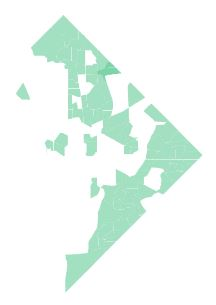

In [66]:
print(type(pp_sdf.spatial))
display(pp_sdf.spatial)

Because `pp_sdf.iloc[0]` is just one of the 98 features contained in the `pp_sdf`, its shape (as shown below) would only show as part of the shape previewed above.

<class 'arcgis.geometry._types.Polygon'>



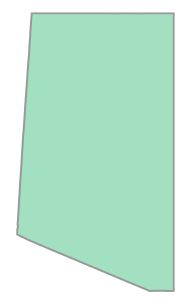

In [70]:
pp_sdf_row0 = pp_sdf.iloc[0].SHAPE
print(type(pp_sdf_row0))
display(pp_sdf_row0)

### Get geometries from a local layer

Previously, we have seen how geometries can be extracted from existing web feature layer, let's now take a look at how to read a local layer into a `SeDF` and get geometries from it. 

To illustrate, we can save the `SeDF` into a local `FeatureClass` object (in the format of shapefile), then show how geometries can be extracted from the local layer:

In [25]:
dc_shp_path = dc_df.spatial.to_featureclass("./dc_feature_class")
dc_shp_path

./dc_feature_class


In [72]:
dc_df_from_fc = pd.DataFrame.spatial.from_featureclass(dc_shp_path)
dc_df_from_fc

,index,objectid,city_name,state_city,capital,web_url,areakm,areamiles,shape_leng,shape_area,SHAPE,OBJECTID
0,0,1,Washington,1150000,Y,http://www.dc.gov,177.47,68.52,67608.276922,1.774562e+08,"{""rings"": [[[-8584936.334474642, 4712272.26069...",0



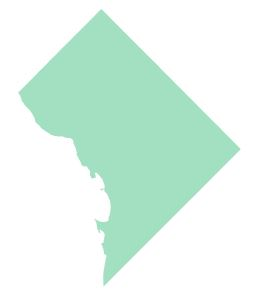

In [75]:
dc_df_from_fc.spatial

Upon validation with the `dc_df.spatial` object, the shapes look identical. Or we can check its geometry as represented in JSON:

In [74]:
dc_df_from_fc["SHAPE"]

0    {"rings": [[[-8584936.334474642, 4712272.26069...
Name: SHAPE, dtype: geometry

## Construct higher level objects from geometry objects

Now we have learnt how to extract geometries from `FeatureLayer`, `FeatureSet`, `Feature` objects, and local feature layer, let's turn the workflow upside down, and focus at composing `Feature`, `FeatureSet`, and `SeDF` objects from geometry objects:


### Create `Feature`, `FeatureSet` and `FeatureCollection` objects from `Geometry` objects

With geometry objects (point or line or polygon) created, how do we create a `Feature`, and `FeatureSet` objects out of them? Let's first look at an example of two Point geometries created from scratch:

In [28]:
pt_1 = Point({'x': -101.376, 'y': 31.119})
fire_1 = Feature(geometry=pt_1, attributes={"id": "EONET_4959",
                                            "title": "Ferguson Fire",
                                            "description": "",
                                            "link": "https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4959",
                                            "categories": {
                                                "id": 8,
                                                "title": "Wildfires"
                                            }})
fire_1

{"geometry": {"x": -101.376, "y": 31.119}, "attributes": {"id": "EONET_4959", "title": "Ferguson Fire", "description": "", "link": "https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4959", "categories": {"id": 8, "title": "Wildfires"}}}

In [29]:
pt_2 = Point({'x': -101.91, 'y': 30.859999999999999})
fire_2 = Feature(geometry=pt_2, attributes={"id": "EONET_4958",
                                            "title": "Smith Canyon Fire",
                                            "description": "",
                                            "link": "https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4958",
                                            "categories": {
                                                "id": 8,
                                                "title": "Wildfires"
                                            }})
fire_2

{"geometry": {"x": -101.91, "y": 30.86}, "attributes": {"id": "EONET_4958", "title": "Smith Canyon Fire", "description": "", "link": "https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_4958", "categories": {"id": 8, "title": "Wildfires"}}}

In [31]:
fires_fset = FeatureSet(features = [fire_1, fire_2], 
                        geometry_type="Point", 
                        spatial_reference={'latestWkid': 4326, 'wkid': 102100})
fires_fset

<FeatureSet> 2 features

In [32]:
fires_fset.sdf

,id,title,description,link,categories,OBJECTID,SHAPE
0,EONET_4959,Ferguson Fire,,https://eonet.sci.gsfc.nasa.gov/api/v2.1/event...,"{'id': 8, 'title': 'Wildfires'}",1,"{""type"": ""Point"", ""coordinates"": [-101.376, 31..."
1,EONET_4958,Smith Canyon Fire,,https://eonet.sci.gsfc.nasa.gov/api/v2.1/event...,"{'id': 8, 'title': 'Wildfires'}",2,"{""type"": ""Point"", ""coordinates"": [-101.91, 30...."


In [33]:
fires_fc = FeatureCollection.from_featureset(fset=fires_fset)
fires_fc

<FeatureCollection>

### Create an `SeDF` object with geometries

Besides `Feature`, `FeatureSet`, and `FeatureCollection`, `SeDF` objects can also be created with geometry objects.

In [34]:
dc_recycle_geom1_dict = {"x":-77.1188753,"y":38.8614258,"spatialReference":{"wkid":4326}}
dc_recycle_geom2_dict = {"x":-77.08481,"y":38.8478148,"spatialReference":{"wkid":4326}}

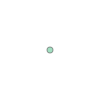

In [37]:
dc_recycle_geom1 = Geometry(dc_recycle_geom1_dict)
display(dc_recycle_geom1)

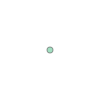

In [38]:
dc_recycle_geom2 = Geometry(dc_recycle_geom2_dict)
display(dc_recycle_geom2)

In [39]:
dc_recycle_dict = {"osm_id":{"0":"2607287308","1":"3752101908"},
                   "amenity":{"0":"recycling","1":"recycling"},
                   "source":{"0":"site visit","1":"GPSO"},
                   "recycling_type":{"0":"container","1":"container"}
                   }
dc_recycle_df = pd.DataFrame.from_dict(dc_recycle_dict)
dc_recycle_df.head()

,osm_id,amenity,source,recycling_type
0,2607287308,recycling,site visit,container
1,3752101908,recycling,GPSO,container


In [40]:
dc_recycle_df["X"] = [dc_recycle_geom1.x, dc_recycle_geom2.x]
dc_recycle_df["Y"] = [dc_recycle_geom1.y, dc_recycle_geom2.y]
dc_recycle_df.head()

,osm_id,amenity,source,recycling_type,X,Y
0,2607287308,recycling,site visit,container,-77.118875,38.861426
1,3752101908,recycling,GPSO,container,-77.084810,38.847815


In [43]:
dc_recycle_sedf = GeoAccessor.from_xy(dc_recycle_df, x_column="X", y_column="Y", sr=4326)
dc_recycle_sedf.head()

,osm_id,amenity,source,recycling_type,X,Y,SHAPE
0,2607287308,recycling,site visit,container,-77.118875,38.861426,"{""spatialReference"": {""wkid"": 4326}, ""x"": -77...."
1,3752101908,recycling,GPSO,container,-77.084810,38.847815,"{""spatialReference"": {""wkid"": 4326}, ""x"": -77...."



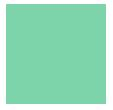

In [77]:
dc_recycle_sedf.spatial

The `dc_recycle_sedf` object would be showing a shape of rectangle in the previous cell if you are currently on arcpy or shapely geometry engines. If not, then you would see its JSON representation instead.

In [76]:
dc_recycle_sedf.SHAPE

0    {"spatialReference": {"wkid": 4326}, "x": -77....
1    {"spatialReference": {"wkid": 4326}, "x": -77....
Name: SHAPE, dtype: geometry

## Conclusion

In this part of the guide series to `arcgis.geometry` module, you have seen the introduction to the module, how to create `Geometry` objects, what are the basic properties, and how to work with one, including its interactions with map widgets. Also, it explores how geometries can be extracted from existing web layers or local feature classes, and also provides introduction to how `Feature`, `FeatureSet`, `FeatureCollection` and `SeDF` objects can be constructed from geometries.

Next, part 3 will discuss the spatial operations of geometry objects, and how to process through geometry services, and part 4 will talk about geometry filters and how they being applied in query, search and mapping.